<a href="https://colab.research.google.com/github/RizzqiAkbar/Statistic-and-Probability/blob/main/Final_Project_StatProb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File Insert and Library

In [1]:
import numpy as np
from scipy import stats as sts
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import chi2_contingency
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Statprob Anjay/gym_members_exercise_tracking.csv" -r ./
df = pd.read_csv('gym_members_exercise_tracking.csv')

Mounted at /content/drive


#File Analysis

In [ ]:
display(df.head(n = 10))

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [ ]:
display(df.describe()[["Age", "Weight (kg)", "Height (m)", "Calories_Burned", "Avg_BPM", "Max_BPM", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]])

,Age,Weight (kg),Height (m),Calories_Burned,Avg_BPM,Max_BPM,Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,905.422405,143.766701,179.883864,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,272.641516,14.345101,11.525686,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,303.000000,120.000000,160.000000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,720.000000,131.000000,170.000000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,893.000000,143.000000,180.000000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,1076.000000,156.000000,190.000000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,1783.000000,169.000000,199.000000,5.000000,3.000000,49.840000


In [ ]:
group = df.groupby('Workout_Type').size().sort_values(ascending=False).reset_index(name='Count')
display(group)

,Workout_Type,Count
0,Strength,258
1,Cardio,255
2,Yoga,239
3,HIIT,221


# Histogram

In [ ]:
fig = px.histogram(df, x = "Age")
fig.show()
fig = px.histogram(df, x = "Gender")
fig.show()
fig = px.histogram(df, x = "Weight (kg)")
fig.show()
fig = px.histogram(df, x = "Height (m)")
fig.show()
fig = px.histogram(df, x = "Workout_Type")
fig.show()
fig = px.histogram(df, x = "Calories_Burned")
fig.show()

# Distribution Between 2 Variables

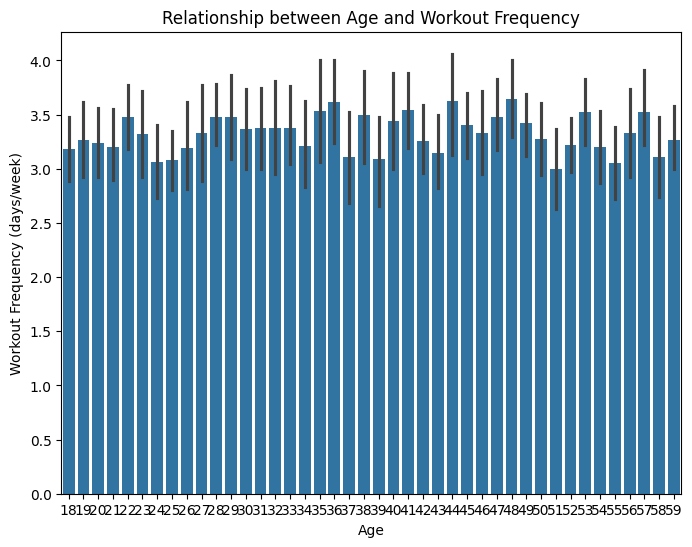

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='Workout_Frequency (days/week)', data=df)
plt.title('Relationship between Age and Workout Frequency')
plt.xlabel('Age')
plt.ylabel('Workout Frequency (days/week)')
plt.show()

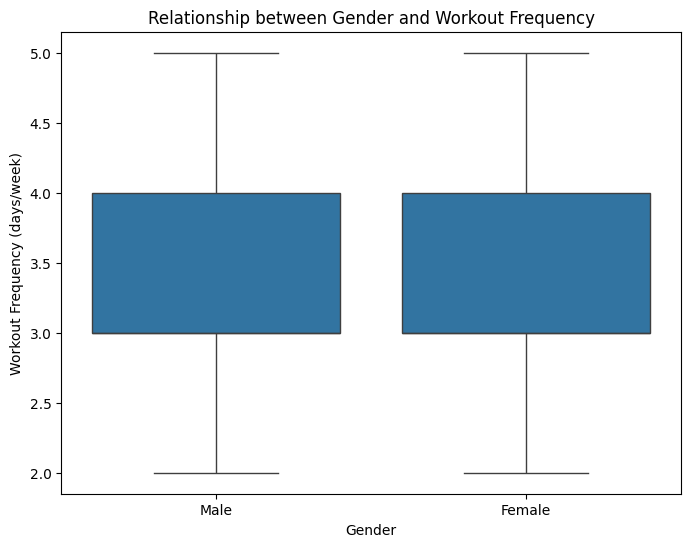

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Workout_Frequency (days/week)', data=df)
plt.title('Relationship between Gender and Workout Frequency')
plt.xlabel('Gender')
plt.ylabel('Workout Frequency (days/week)')
plt.show()

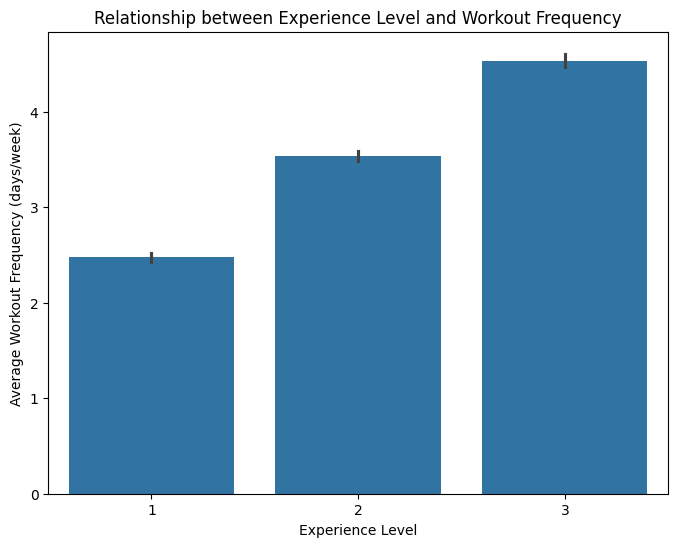

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Experience_Level', y='Workout_Frequency (days/week)', data=df)
plt.title('Relationship between Experience Level and Workout Frequency')
plt.xlabel('Experience Level')
plt.ylabel('Average Workout Frequency (days/week)')
plt.show()

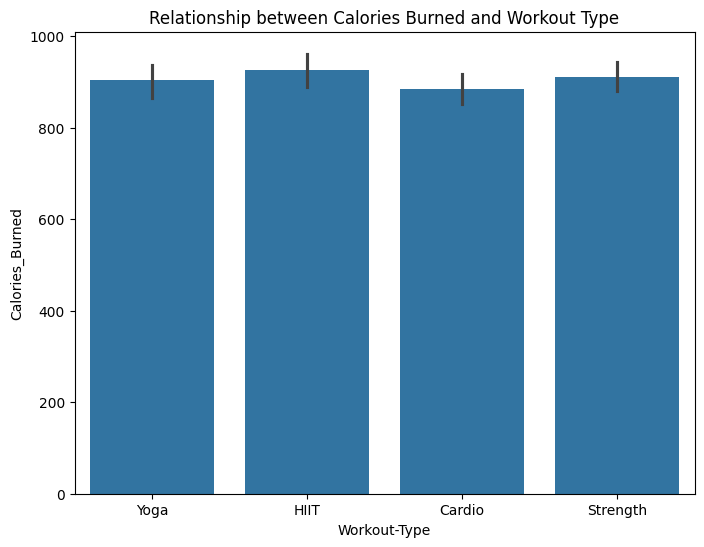

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Relationship between Calories Burned and Workout Type')
plt.xlabel('Workout-Type')
plt.ylabel('Calories_Burned')
plt.show()

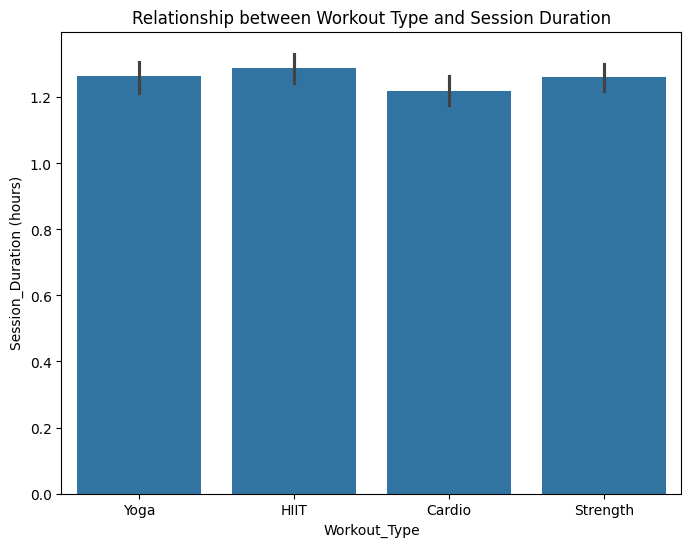

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Workout_Type', y='Session_Duration (hours)', data=df)
plt.title('Relationship between Workout Type and Session Duration')
plt.xlabel('Workout_Type')
plt.ylabel('Session_Duration (hours)')
plt.show()

# Correlation

In [ ]:
# Korelasi antara Calories Burned dan Session Duration
korelasi = df['Calories_Burned'].corr(df['Session_Duration (hours)'])
print(f"Korelasi antara Calories Burned dan Session Duration: {korelasi}")

Korelasi antara Calories Burned dan Session Duration: 0.9081403755270124


In [ ]:
# Korelasi antara Calories Burned dan Workout Frequency
korelasi = df['Calories_Burned'].corr(df['Workout_Frequency (days/week)'])
print(f"Korelasi antara Calories Burned dan Workout Frequency: {korelasi}")

Korelasi antara Calories Burned dan Workout Frequency: 0.5761501254548645


In [ ]:
# Korelasi antara Experience Level dan Workout Frequency
korelasi = df['Experience_Level'].corr(df['Workout_Frequency (days/week)'])
print(f"Korelasi antara Experience Level dan Workout Frequency: {korelasi}")

Korelasi antara Experience Level dan Workout Frequency: 0.8370787093906671


In [ ]:
# Korelasi antara Experience Level dan Session Duration
korelasi = df['Experience_Level'].corr(df['Session_Duration (hours)'])
print(f"Korelasi antara Experience Level dan Session Duration: {korelasi}")

Korelasi antara Experience Level dan Session Duration: 0.7647681188532212


In [ ]:
# Korelasi antara Fat Percentage dan Session Duration
korelasi = df['Fat_Percentage'].corr(df['Session_Duration (hours)'])
print(f"Korelasi antara Fat Percentage dan Session Duration: {korelasi}")

Korelasi antara Fat Percentage dan Session Duration: -0.5815197713486117


In [ ]:
# Korelasi antara Fat Percentage dan Calories Burned
korelasi = df['Fat_Percentage'].corr(df['Calories_Burned'])
print(f"Korelasi antara Fat Percentage dan Calories Burned: {korelasi}")

Korelasi antara Fat Percentage dan Calories Burned: -0.5976152476507984


In [ ]:
# Korelasi antara Water Intake dan Session Duration
korelasi = df['Water_Intake (liters)'].corr(df['Session_Duration (hours)'])
print(f"Korelasi antara Water Intake dan Session Duration: {korelasi}")

Korelasi antara Water Intake dan Session Duration: 0.28341097741334914


In [ ]:
# Korelasi antara Water Intake dan Calories Burned
korelasi = df['Water_Intake (liters)'].corr(df['Calories_Burned'])
print(f"Korelasi antara Water Intake dan Calories Burned: {korelasi}")

Korelasi antara Water Intake dan Calories Burned: 0.35693068300463876


## Pearson Correlation

The Pearson correlation coefficient is a descriptive statistic, meaning that it summarizes the characteristics of a dataset. Specifically, it describes the strength and direction of the linear relationship between two quantitative variables.

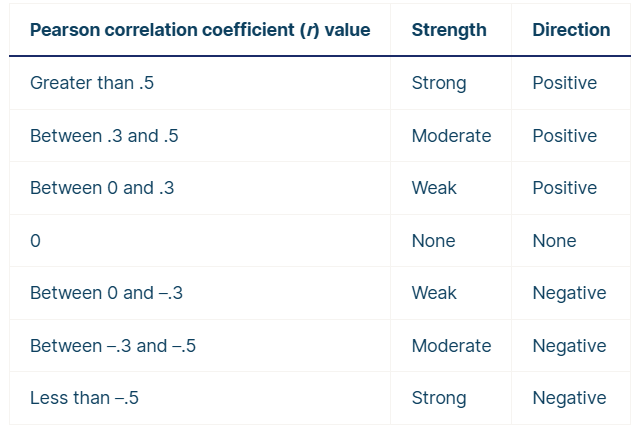

The Formula :

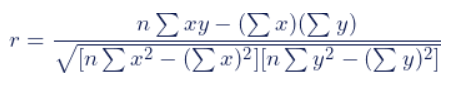

## Summary Correalation

Berdasarkan hasil analisis data dengan korelasi di atas, dapat disimpulkan bahwa :

1. Korelasi antara kalori yang dibakar dengan durasi per sesi dan frekuensi olahraga bernilai positif hampir sempurna yang menunjukkan bahwa hubungan kedua variabel berhubungan. semakin lama durasi dan semakin besar frekuensi latihan, maka kalori yang terbakar juga semakin banyak.
2. level pengalaman dengan sesi durasi dan frekuensi olahraga memiliki korelasi yang bernilai positif hampir sempurna yang menunjukkan bahwa hubungan kedua variabel berhubungan. Semakin tinggi pengalaman, semakin lama sesi durasi dan semakin besar frekuensi latihan.
3. Persentase lemak berkorelasi negatif dengan sesi durasi dan kalori yang terbakar. Ini menunjukkan bahwa individu dengan lemak tubuh lebih rendah cenderung memiliki durasi latihan lebih lama dan membakar lebih banyak kalori.
4. water intake memiliki korelasi sedang dengan sesi durasi dan kalori yang terbakar. Ini menunjukkan bahwa kemungkinan dengan water intake yang banyak akan menambah durasi latihan dan kalori yang terbakar.


# Uji Chi Square

In [ ]:
# Buat tabel kontingensi 1 Workout Type and Calories Burned
kontingensi1 = pd.crosstab(df['Workout_Type'], df['Calories_Burned'])
display(kontingensi1)

Calories_Burned,303.0,319.0,330.0,331.0,333.0,350.0,353.0,354.0,362.0,363.0,...,1622.0,1625.0,1634.0,1646.0,1675.0,1688.0,1701.0,1725.0,1766.0,1783.0
Workout_Type,,,,,,,,,,,,,,,,,,,,,
Cardio,1,1,0,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
HIIT,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
Strength,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,1,1,0,1
Yoga,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Buat tabel kontingensi 2 Workout Type and Experience Level
kontingensi2 = pd.crosstab(df['Workout_Type'], df['Experience_Level'])
display(kontingensi2)

Experience_Level,1,2,3
Workout_Type,,,
Cardio,109,102,44
HIIT,85,87,49
Strength,97,116,45
Yoga,85,101,53


In [ ]:
# Buat tabel kontingensi 3 Workout Type and Session Duration
kontingensi3 = pd.crosstab(df['Workout_Type'], df['Session_Duration (hours)'])
display(kontingensi3)

Session_Duration (hours),0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,...,1.90,1.91,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00
Workout_Type,,,,,,,,,,,,,,,,,,,,,
Cardio,0,3,1,1,3,1,0,1,2,1,...,1,1,1,0,0,0,1,0,2,0
HIIT,0,0,0,1,0,1,2,0,0,0,...,2,0,1,1,0,0,1,0,1,0
Strength,0,1,2,0,2,0,1,1,0,1,...,0,1,2,1,0,2,4,2,0,1
Yoga,1,1,0,0,0,2,0,1,1,0,...,2,1,2,1,2,0,0,4,2,0


In [ ]:
# Uji Chi-Square 1
chi2, p, dof, expected = chi2_contingency(kontingensi1)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square: 1862.1776446626534
P-Value: 0.4814081996534032
Degrees of Freedom: 1860
Expected Frequencies:
[[0.26207605 0.26207605 0.26207605 ... 0.26207605 0.26207605 0.26207605]
 [0.22713258 0.22713258 0.22713258 ... 0.22713258 0.22713258 0.22713258]
 [0.2651593  0.2651593  0.2651593  ... 0.2651593  0.2651593  0.2651593 ]
 [0.24563207 0.24563207 0.24563207 ... 0.24563207 0.24563207 0.24563207]]


In [ ]:
# Uji Chi-Square 2
chi2, p, dof, expected = chi2_contingency(kontingensi2)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square: 5.790311201260715
P-Value: 0.4470849019787354
Degrees of Freedom: 6
Expected Frequencies:
[[ 98.54059609 106.4028777   50.05652621]
 [ 85.40184995  92.21582734  43.38232271]
 [ 99.69989723 107.65467626  50.64542652]
 [ 92.35765673  99.72661871  46.91572456]]


In [ ]:
# Uji Chi-Square 3
chi2, p, dof, expected = chi2_contingency(kontingensi3)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square: 392.821801892772
P-Value: 0.9405714060836904
Degrees of Freedom: 438
Expected Frequencies:
[[0.26207605 1.31038027 0.78622816 0.52415211 1.31038027 1.04830421
  0.78622816 0.78622816 0.78622816 0.52415211 0.52415211 1.04830421
  0.52415211 1.04830421 1.04830421 1.57245632 0.78622816 1.31038027
  1.04830421 0.78622816 0.78622816 1.31038027 1.04830421 1.31038027
  1.04830421 1.31038027 1.83453237 0.26207605 0.78622816 0.52415211
  2.09660843 1.04830421 1.31038027 1.31038027 1.31038027 0.52415211
  0.52415211 0.78622816 1.83453237 1.04830421 1.04830421 1.31038027
  1.31038027 0.78622816 0.52415211 1.04830421 2.09660843 0.78622816
  2.35868448 2.88283659 2.88283659 5.24152107 2.62076053 1.57245632
  2.35868448 2.88283659 4.97944502 2.62076053 3.14491264 1.83453237
  1.57245632 5.24152107 4.19321686 2.88283659 1.83453237 3.40698869
  2.88283659 2.62076053 3.9311408  1.83453237 2.35868448 2.09660843
  2.88283659 2.62076053 3.14491264 3.14491264 3.66906475 4.45529291
  2.88283659 

## Chi Square

adalah metode statistik yang digunakan untuk menguji hubungan antara dua variabel kategori. Uji ini membantu menentukan apakah ada hubungan yang signifikan secara statistik antara dua variabel atau apakah hubungan itu terjadi secara kebetulan.

**Jenis Uji Chi-Square**

1. Chi-Square Test of Independence:

Digunakan untuk mengetahui apakah ada hubungan antara dua variabel kategori.
Contoh: Apakah jenis kelamin memengaruhi preferensi tipe olahraga (yoga, HIIT, strength)?

2. Chi-Square Goodness of Fit Test:

Digunakan untuk membandingkan distribusi data aktual dengan distribusi yang diharapkan berdasarkan hipotesis tertentu.
Contoh: Apakah proporsi anggota gym berdasarkan kategori pengalaman (beginner, intermediate, expert) sesuai dengan distribusi yang diharapkan?

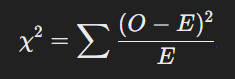


di mana:

O: Frekuensi yang diamati.

E: Frekuensi yang diharapkan.

**Hasil Uji Chi-Square**

**Nilai p: Jika**

p lebih kecil dari tingkat signifikansi (biasanya 0.05), maka kita menolak hipotesis nol dan menyimpulkan bahwa ada hubungan antara kedua variabel.

Nilai Chi-Square (
χ
2
 ): Mengukur seberapa besar perbedaan antara data yang diamati dan yang diharapkan.

## Summary Chi Square

Berdasarkan hasil analisis data dengan uji chi square, dapat disimpulkan bahwa :

Dari ketiga uji di atas, kontingensi 1, kontingensi 2, dan kontingensi 3, didapatkan nilai p di atas 0,05 semua yang berarti tidak ada pengaruh yang signifikan antara 2 variabel yang diuji.

# Export to PDF

In [3]:
!apt-get install pandoc
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [6]:
# Copy the notebook file from Google Drive to the current working directory
!cp "/content/drive/My Drive/Statprob Anjay/Final Project StatProb.ipynb" ./

# Convert the notebook to a PDF
!jupyter nbconvert --to pdf "Final Project StatProb.ipynb"

[NbConvertApp] Converting notebook Final Project StatProb.ipynb to pdf
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Final Project StatProb_files/
[NbConvertApp] Making directory ./Final Project StatProb_files
[NbConvertApp] Writing 96473 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 192635 bytes to Final Project StatProb.pdf
